# Plot bottom temperature anomonalies for WIND+, WIND-, WIND+zonal, WIND+meridional

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.colors as col
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.path as mpath
import cosima_cookbook as cc
import cmocean.cm as cmocean
import cmocean.cm as cm
from collections import OrderedDict
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [2]:
from dask.distributed import Client
client = Client()
client

2022-06-09 16:23:31,369 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/akm157/jupyter_scripts/easterlies-collaborative-project/notebooks/figures/dask-worker-space/worker-4ki5y6k2', purging
2022-06-09 16:23:31,377 - distributed.diskutils - INFO - Found stale lock file and directory '/g/data/v45/akm157/jupyter_scripts/easterlies-collaborative-project/notebooks/figures/dask-worker-space/worker-64yyjfxq', purging
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a ne

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43251,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:43317,Total threads: 4
Dashboard: /proxy/39709/status,Memory: 18.29 GiB
Nanny: tcp://127.0.0.1:41193,


In [3]:
# database for control simulation:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
control = '01deg_jra55v13_ryf9091'

# database for perturbations:
easterlies_session = cc.database.create_session('/g/data/v45/akm157/model_data/access-om2/01deg_jra55v13_ryf9091_easterlies_up10/easterlies.db')
# 10% increase in easterly wind speed:
easterlies_up = '01deg_jra55v13_ryf9091_easterlies_up10'
# 10% decrease in easterly wind speed:
easterlies_down = '01deg_jra55v13_ryf9091_easterlies_down10'
# 10% increase in easterly wind speed, meridional component only:
easterlies_up_mer = '01deg_jra55v13_ryf9091_easterlies_up10_meridional'
# 10% increase in easterly wind speed, zonal component only:
easterlies_up_zon = '01deg_jra55v13_ryf9091_easterlies_up10_zonal'

# plot anomalies for 5 years, years 5-10 of simulation:
#start_time = '2159-01-01' 
start_time = '2155-01-01'
end_time   = '2159-12-31'

lat_slice  = slice(-80,-59)

In [4]:
# topography data for plotting:
ht = cc.querying.getvar(control,'ht' , master_session,n=1)
ht = ht.sel(yt_ocean=lat_slice)
ht = ht.load()
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = ht.yt_ocean.values
land_mask_lat[0] = -90

fontsize = 13

## Import bottom temperature

Temperature

In [5]:
temp_con = cc.querying.getvar(control,'temp' , master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
temp_con = temp_con.sel(yt_ocean=lat_slice).sel(time=slice(start_time,end_time)).mean('time')                             

temp_up = cc.querying.getvar(easterlies_up, 'temp', easterlies_session, frequency='1 monthly', start_time=start_time, end_time=end_time)
temp_up = temp_up.sel(yt_ocean=lat_slice).sel(time=slice(start_time,end_time)).mean('time')                             

temp_down = cc.querying.getvar(easterlies_down,'temp', easterlies_session, frequency='1 monthly', start_time=start_time, end_time=end_time)
temp_down = temp_down.sel(yt_ocean=lat_slice).sel(time=slice(start_time,end_time)).mean('time')  

temp_up_mer = cc.querying.getvar(easterlies_up_mer, 'temp', easterlies_session, frequency='1 monthly', start_time=start_time, end_time=end_time)
temp_up_mer = temp_up_mer.sel(yt_ocean=lat_slice).sel(time=slice(start_time,end_time)).mean('time') 

temp_up_zon = cc.querying.getvar(easterlies_up_zon, 'temp', easterlies_session, frequency='1 monthly', start_time=start_time, end_time=end_time)
temp_up_zon = temp_up_zon.sel(yt_ocean=lat_slice).sel(time=slice(start_time,end_time)).mean('time')  

In [6]:
# select out bottom values:
depth_array = temp_con * 0 + temp_con.st_ocean
max_depth   = depth_array.max(dim = 'st_ocean', skipna= True)

In [7]:
bottom_temp_con = temp_con.where(depth_array.st_ocean >= max_depth)
bottom_temp_con = bottom_temp_con.sum(dim = 'st_ocean')
bottom_temp_con = bottom_temp_con.load()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice 

In [8]:
bottom_temp_up = temp_up.where(depth_array.st_ocean >= max_depth)
bottom_temp_up = bottom_temp_up.sum(dim = 'st_ocean')
bottom_temp_up = bottom_temp_up.load()

In [9]:
bottom_temp_down = temp_down.where(depth_array.st_ocean >= max_depth)
bottom_temp_down = bottom_temp_down.sum(dim = 'st_ocean')
bottom_temp_down = bottom_temp_down.load()

In [10]:
bottom_temp_up_mer = temp_up_mer.where(depth_array.st_ocean >= max_depth)
bottom_temp_up_mer = bottom_temp_up_mer.sum(dim = 'st_ocean')
bottom_temp_up_mer = bottom_temp_up_mer.load()

In [11]:
bottom_temp_up_zon = temp_up_zon.where(depth_array.st_ocean >= max_depth)
bottom_temp_up_zon = bottom_temp_up_zon.sum(dim = 'st_ocean')
bottom_temp_up_zon = bottom_temp_up_zon.load()

## Plotting

In [20]:
# Figure path
#fig_path = '/g/data/x77/wgh581/Figures/Easterlies-Collab/'
fig_path = '/g/data/v45/akm157/figures/easterlies/paper_figures/'
# Panel labels
panel_name = ['a)', 'b)', 'c)', 'd)']
# Font size
plt.rcParams['font.size'] = 18
# Axes
plt.rcParams['axes.facecolor']  = 'white'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
# Saving parameters
plt.rcParams['savefig.dpi']  = 150
plt.rcParams['savefig.bbox'] = 'tight'

Isobath

In [13]:
contour_data  = np.load('/g/data/v45/akm157/model_data/access-om2/Antarctic_slope_contour_1000m.npz')
contour_mask_numbered = contour_data['contour_mask_numbered']
contour_1000m = np.where(contour_mask_numbered == 0, contour_mask_numbered, 1000)
contour_xt_ocean = contour_data['xt_ocean']
contour_yt_ocean = contour_data['yt_ocean']

DSW region patches

In [19]:
# DSW regions:
poly1 = mpatches.Polygon(np.transpose(np.array([[161.5-360,170-360,170-360,161.5-360,161.5-360],[-79,-79,-72,-72,-79]])),
                         closed = True, ec = 'darkgoldenrod', 
                        fill = False, lw = 2, fc = 'goldenrod', alpha = 0.8, zorder = 2)
poly2 = mpatches.Polygon(np.transpose(np.array([[58,73,73,58,58],[-69,-69,-67,-67,-69]])), closed = True, ec = 'darkgoldenrod', 
                        fill = False, lw = 2, fc = 'goldenrod', alpha = 0.8, zorder = 2)
poly3 = mpatches.Polygon(np.transpose(np.array([[138-360,148-360,148-360,138-360,138-360],[-69,-69,-66.2,-66.2,-69]])),
                         closed = True, ec = 'darkgoldenrod', 
                        fill = False, lw = 2, fc = 'goldenrod', alpha = 0.8, zorder = 2)
poly4 = mpatches.Polygon(np.transpose(np.array([[297-360,305-360,305-360,320-360,320-360,305-360,305-360,297-360,297-360],
                                                [-70,-70,-75,-75,-79,-79,-77,-77,-70]])), closed = True, ec = 'darkgoldenrod', 
                        fill = False, lw = 2, fc = 'goldenrod', alpha = 0.8, zorder = 2)

Bottom temp anomaly, WIND+, WIND-, WIND+merid, WIND+zonal

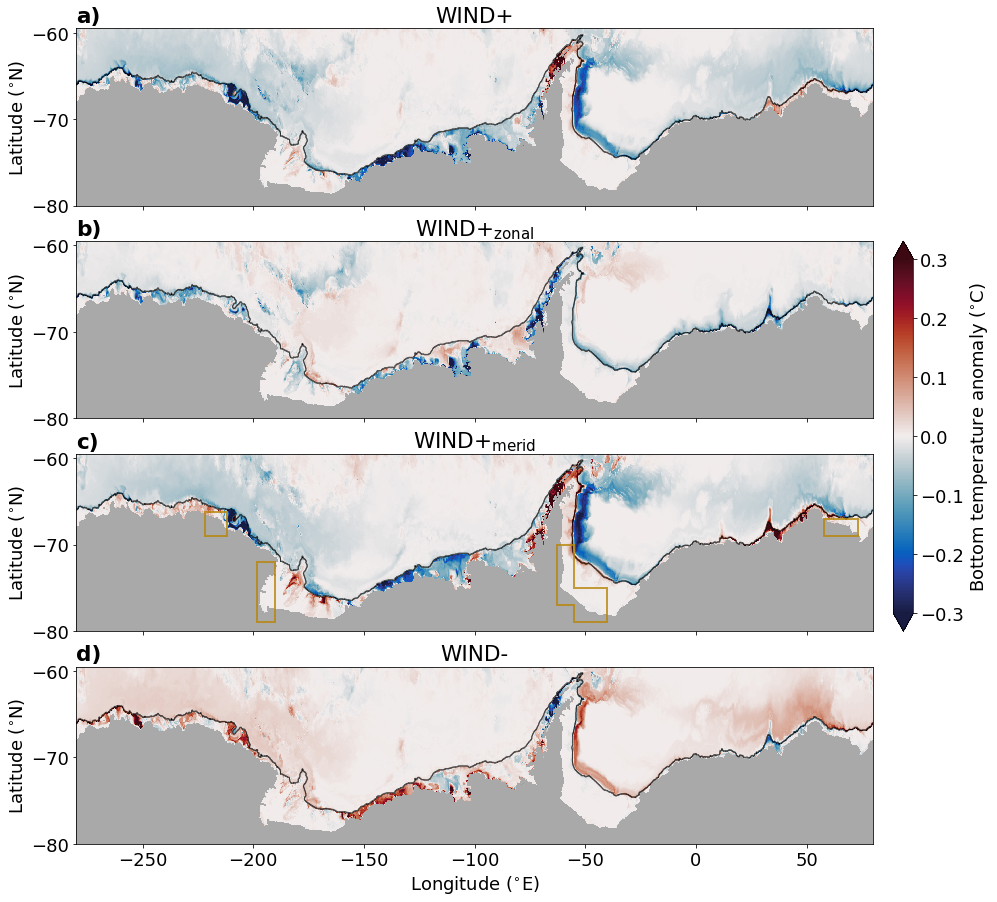

2022-06-09 20:23:30,202 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,294 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,377 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,467 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,471 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,474 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,528 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,715 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:30,720 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:31,468 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:31,471 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:31,512 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:31,552 - distributed.nanny - WARNING - Restarting worker
2022-06-09 20:23:31,598 - distributed.

In [21]:
fig = plt.figure(figsize=(15, 15))
# Panel title
title_name = ['WIND+', 'WIND+$_\mathrm{zonal}$', 'WIND+$_\mathrm{merid}$', 'WIND-']
# Subplots grid
gs  = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1], width_ratios=[1, 0.025], wspace=0.05)

# Define subplot, add panel title and label
def plot_land():
    ax.set_title(panel_name[ii], loc='left', fontweight='bold')    
    ax.set_xlim([-280, 80])
    ax.set_ylim([-80, -59.5])
    # Add land 
    ax.contourf(ht.xt_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
    ax.contour(contour_xt_ocean, contour_yt_ocean, contour_1000m, [1000],colors='k', linewidths=0.5)

for ii in range(4):
    if ii == 0:
        # Temp, WIND+
        ax = fig.add_subplot(gs[ii])
        ax.set_title(title_name[ii])
        plot_land()
        cf = ax.pcolormesh(bottom_temp_con.xt_ocean, bottom_temp_con.yt_ocean, (bottom_temp_up-bottom_temp_con), 
                           cmap=cmocean.balance, vmin=-0.3, vmax=0.3) 
    elif ii == 1:
        # Temp, WIND+zonal
        ax = fig.add_subplot(gs[ii+1])
        ax.set_title(title_name[ii])
        plot_land()
        cf = ax.pcolormesh(bottom_temp_con.xt_ocean, bottom_temp_con.yt_ocean, (bottom_temp_up_zon-bottom_temp_con), 
                           cmap=cmocean.balance, vmin=-0.3, vmax=0.3) 
    elif ii == 2:
        # Temp, WIND+merid
        ax = fig.add_subplot(gs[ii+2])
        ax.set_title(title_name[ii])
        plot_land()
        cf = ax.pcolormesh(bottom_temp_con.xt_ocean, bottom_temp_con.yt_ocean, (bottom_temp_up_mer-bottom_temp_con), 
                           cmap=cmocean.balance, vmin=-0.3, vmax=0.3)
        # Masked DSW regions
        ax.add_patch(poly1)
        ax.add_patch(poly2)
        ax.add_patch(poly3)
        ax.add_patch(poly4)
    elif ii == 3:
        # Temp, WIND-
        ax = fig.add_subplot(gs[ii+3])
        ax.set_title(title_name[ii])
        plot_land()
        cf = ax.pcolormesh(bottom_temp_con.xt_ocean, bottom_temp_con.yt_ocean, (bottom_temp_down-bottom_temp_con), 
                           cmap=cmocean.balance, vmin=-0.3, vmax=0.3) 
        plt.xlabel('Longitude ($^{\circ}$E)')
    plt.ylabel('Latitude ($^{\circ}$N)')
    if ii < 3:
        plt.tick_params(labelbottom=False)
        
        
# Add colorbar
cbar_ax = fig.add_subplot(gs[1:-1, -1])
cbar = plt.colorbar(cf, cax=cbar_ax, extend='both') # fraction=0.03, pad=0.01
cbar.set_label('Bottom temperature anomaly ($^{\circ}$C)')

# Finished
save_fig = 1
if save_fig == 1:
    fig_name = 'Figure9.png'
    plt.savefig(fig_path + fig_name)